In [1]:
import time

# data processing library
import numpy as np
import pandas as pd
from functools import reduce
import collections

# data visualization library  
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


# Read Data

## Description of the fields

- HCP_ID
    - HCP0001018487

    - Physician's ID (at least 1 record per person, multiple records for promotions and multiple emails)

    - (diverse)


- ACCOUNT_TYPE
    - Account type

    - Specifies the account type of the customer's email address.
    
    - Private, Klinic (clinic), Nicht eindeutig (ambiguous)
    
 
- EMAIL_ID
    - ID1
    - Email ID that can be used to uniquely identify an email. The same emails have the same ID
    -  ID1, ID2,....ID120

- DELIVERY_STATUS
    - sent
    - Delivery Status of email
    - Sent, opened, clicked, failed

- PRODUKT
    - Produkt1
    - Product Name
    - Produkt 1, Produkt 2,...Produkt 6
 
- DATUM_ID
    - 20190109
    - Email activity date, format YYYYMMDD (can be NULL)
    - (diverse)
  
- DAY
    - 09.01.2019 21:00
    - Date and time of the email activity, format DD.MM.YYYY HH: MM (can be NULL) The times are always rounded to the hour
    - (diverse)






In [50]:
df_account = pd.read_excel('Account_Cluster.xlsx')


In [51]:
def get_hcp_id(row):
    return row['HCP_ID;ACCOUNT_TYPE'].split(';')[0]

def get_account_type(row):
    return row['HCP_ID;ACCOUNT_TYPE'].split(';')[1]

df_account['HCP_ID'] = df_account.apply(get_hcp_id, axis=1)
df_account['ACCOUNT_TYPE'] = df_account.apply(get_account_type, axis=1)
df_account.drop(columns=['HCP_ID;ACCOUNT_TYPE'], inplace=True)


In [52]:
df_account

,HCP_ID,ACCOUNT_TYPE
0,HCP0001018487,private
1,HCP0001006058,private
2,HCP0001013999,private
3,HCP0001002071,private
4,HCP0001008572,private
...,...,...
17040,HCP0001014874,klinik
17041,HCP0001005716,nicht eindeutig
17042,HCP0001005735,nicht eindeutig
17043,HCP0001005065,praxis


In [56]:
df_account.shape

(17045, 2)

In [53]:
df_email_performance = pd.read_csv('EMail_Performance.csv', delimiter=';')


In [54]:
df_email_performance['DATE'] = pd.to_datetime(df_email_performance['DATUM_ID'], format="%Y%m%d")
df_email_performance['DATE_TIME'] = pd.to_datetime(df_email_performance['DAY'], format="%d.%m.%Y %H:%M")

# df_email_performance['DATE_TIME'].dt.hour.unique()


In [55]:
df_email_performance.head()


,HCP_ID,EMAIL_ID,DELIVERY_STATUS,PRODUKT,DATUM_ID,DAY,DATE,DATE_TIME
0,HCP0001001023,ID1,sent,Produkt 1,20190109,09.01.2019 21:00,2019-01-09,2019-01-09 21:00:00
1,HCP0001001024,ID2,opened,Produkt 1,20181024,24.10.2018 01:00,2018-10-24,2018-10-24 01:00:00
2,HCP0001001025,ID3,sent,Produkt 2,20181130,30.11.2018 13:00,2018-11-30,2018-11-30 13:00:00
3,HCP0001001026,ID4,opened,Produkt 3,20181119,19.11.2018 14:00,2018-11-19,2018-11-19 14:00:00
4,HCP0001001027,ID5,opened,Produkt 4,20181213,13.12.2018 14:00,2018-12-13,2018-12-13 14:00:00


In [57]:
df_email_performance.shape


(359777, 8)

In [59]:
len(df_email_performance['HCP_ID'].unique())


18841

In [60]:
len(df_account['HCP_ID'].unique())


17045

In [61]:
df = pd.merge(df_account, df_email_performance, on='HCP_ID', how='right')


In [62]:
df.shape


(359777, 9)

In [63]:
df.head()


,HCP_ID,ACCOUNT_TYPE,EMAIL_ID,DELIVERY_STATUS,PRODUKT,DATUM_ID,DAY,DATE,DATE_TIME
0,HCP0001018487,private,ID51,sent,Produkt 1,20170307,07.03.2017 11:00,2017-03-07,2017-03-07 11:00:00
1,HCP0001006058,private,ID11,sent,Produkt 6,20180516,16.05.2018 14:00,2018-05-16,2018-05-16 14:00:00
2,HCP0001006058,private,ID26,opened,Produkt 4,20181212,12.12.2018 15:00,2018-12-12,2018-12-12 15:00:00
3,HCP0001006058,private,ID26,opened,Produkt 4,20181213,13.12.2018 17:00,2018-12-13,2018-12-13 17:00:00
4,HCP0001006058,private,ID16,opened,Produkt 5,20181113,13.11.2018 19:00,2018-11-13,2018-11-13 19:00:00


# Exploratory Data Analysis (EDA)



In [71]:
def plot_pie_bar(df, col, title=''):
    f,ax=plt.subplots(1, 2, figsize=(20, 8))
    
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    
    sns.countplot(col, order = df[col].value_counts().index, data=df, ax=ax[1])
    ax[1].set_title(col)
    
    plt.title(title)
    plt.show()
    
    return 


In [64]:
df.columns


Index(['HCP_ID', 'ACCOUNT_TYPE', 'EMAIL_ID', 'DELIVERY_STATUS', 'PRODUKT',
       'DATUM_ID', 'DAY', 'DATE', 'DATE_TIME'],
      dtype='object')

## ACCOUNT_TYPE


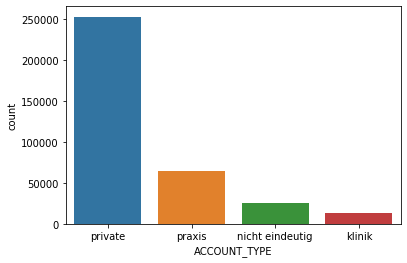

In [65]:
ax = sns.countplot(df['ACCOUNT_TYPE'], label="Count")


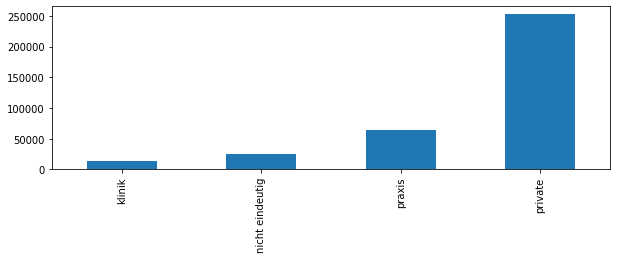

In [69]:
df['ACCOUNT_TYPE'].value_counts().sort_index().plot(kind='bar', figsize=(10, 3))


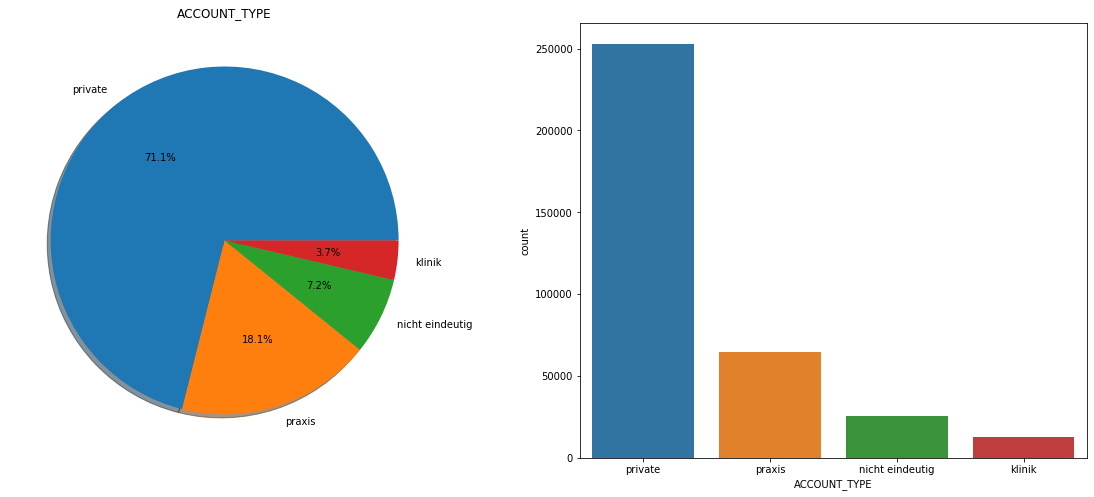

In [72]:
plot_pie_bar(df, 'ACCOUNT_TYPE')
